## **Prediction of charges in "insurance's case"**

  In my work, I used the built-in methods of the sklearn libraries to solve multiple regression problems. Before giving away the data of our model (I chose RandomForestRegressor, because along with other built-in models, this showed the best result) I applied LabelEncoder for encode target labels with value between 0 and n_classes-1.


  As a task, I chose for myself the selection of optimal parameters and methods to obtain the best value of R2_score
  To do this, I watched the results with usual training, training with OneHotEncoder, with Scale, as well as using both of these methods
  On average, the results were best when using only Scale.
  At the same time, my colleague Maxim Stepanovich, watched like the usual sequential model will show itself in the problem of multiple regression with different parameters









In [0]:
import pandas as pd

In [316]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (2).csv


In [0]:
df = pd.read_csv('insurance.csv')

In [0]:
# df

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
label_encoder = LabelEncoder() 

In [0]:
# df['region'].value_counts().plot.barh();

In [0]:
# df['sex'].value_counts().plot.barh();

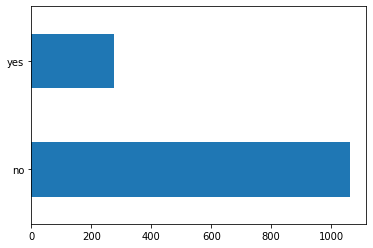

In [484]:
df['smoker'].value_counts().plot.barh();

In [485]:
categorical_columns = df.columns[df.dtypes == 'object']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

# After downloading the data, I applied LabelEncoder which is necessary for our model


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [486]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
trn = df.values[:,:6]
trg = df.values[:, 6]

Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)
Ytrn = Ytrn.astype('int')

In [488]:
model = RandomForestRegressor(n_estimators = 40)
model.fit(Xtrn, Ytrn)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [489]:
model.feature_importances_

# Highest impact are given parameters such as "smoker" and "age". A similar situation was in all models.

array([0.13140778, 0.00643047, 0.21251647, 0.01710708, 0.61772015,
       0.01481804])

In [0]:
import matplotlib.pyplot as plt
import numpy as np
Ypred = model.predict(Xtest)
# plt.plot(Ytest)
# plt.plot(Ypred)
# plt.show()

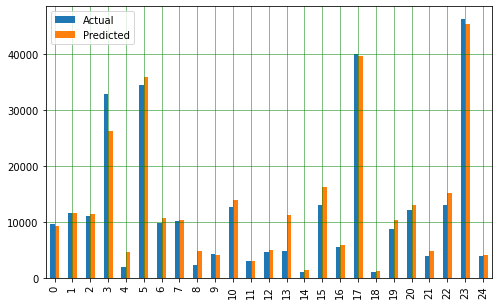

In [491]:
dff = pd.DataFrame({'Actual': Ytest.flatten(), 'Predicted': Ypred.flatten()})
df1 = dff.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [492]:
from sklearn.metrics import r2_score
from sklearn import metrics
print('R2_Error:',r2_score(Ytest, Ypred))

# We can understand R2_score as the similarity of data sets. The closer to 1 the better

R2_Error: 0.8515997974337359


In [493]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, Ypred))  

Mean Absolute Error: 2510.7407286486314


# **Prediction with OHE**

In [0]:
from sklearn.compose import ColumnTransformer
onehot_encoder = OneHotEncoder(sparse=False)
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [1, 4, 5])], 
                                      remainder='passthrough')
df_OHE = np.array(columnTransformer.fit_transform(df), dtype = np.str)

In [495]:
df_OHE

array([['1.0', '0.0', '0.0', ..., '27.9', '0.0', '16884.924'],
       ['0.0', '1.0', '1.0', ..., '33.77', '1.0', '1725.5523'],
       ['0.0', '1.0', '1.0', ..., '33.0', '3.0', '4449.462'],
       ...,
       ['1.0', '0.0', '1.0', ..., '36.85', '0.0', '1629.8335'],
       ['1.0', '0.0', '1.0', ..., '25.8', '0.0', '2007.945'],
       ['1.0', '0.0', '0.0', ..., '29.07', '0.0', '29141.3603']],
      dtype='<U32')

In [0]:
trn_OHE = df_OHE[:,:11]
trg_OHE = df_OHE[:, 11]


Xtrn_OHE, Xtest_OHE, Ytrn_OHE, Ytest_OHE = train_test_split(trn_OHE, trg_OHE, test_size=0.4)
Ytrn_OHE = Ytrn_OHE.astype('float')


In [497]:
Xtrn_OHE

array([['1.0', '0.0', '1.0', ..., '50.0', '31.6', '2.0'],
       ['0.0', '1.0', '1.0', ..., '21.0', '28.975', '0.0'],
       ['0.0', '1.0', '1.0', ..., '29.0', '38.94', '1.0'],
       ...,
       ['1.0', '0.0', '1.0', ..., '49.0', '33.345', '2.0'],
       ['1.0', '0.0', '1.0', ..., '24.0', '27.6', '0.0'],
       ['0.0', '1.0', '0.0', ..., '52.0', '24.32', '3.0']], dtype='<U32')

In [498]:
model_OHE = RandomForestRegressor()
model_OHE.fit(Xtrn_OHE, Ytrn_OHE)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [499]:
model_OHE.feature_importances_

array([0.00352251, 0.00369916, 0.33195778, 0.28042786, 0.00471502,
       0.00609653, 0.00372652, 0.00367282, 0.13238631, 0.21002131,
       0.01977419])

In [0]:
Ypred_OHE = model_OHE.predict(Xtest_OHE)
Ytest_OHE = Ytest_OHE.astype('float')
# plt.plot(Ytest_OHE)
# plt.plot(Ypred_OHE)
# plt.show()

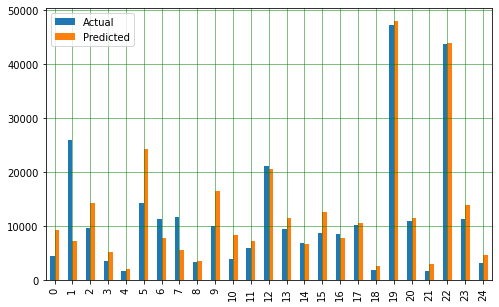

In [501]:
dff = pd.DataFrame({'Actual': Ytest_OHE.flatten(), 'Predicted': Ypred_OHE.flatten()})
df1 = dff.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [502]:
print('R2_Error:',r2_score(Ytest_OHE, Ypred_OHE))

R2_Error: 0.8416838639612156


In [503]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest_OHE, Ypred_OHE))  

Mean Absolute Error: 2726.9794861419964


# **Predict with scale**

In [0]:
from sklearn import preprocessing

trn_scale = df.values[:,:6]
trg_scale = df.values[:, 6]

trg_scale = preprocessing.scale(trg_scale)

Xtrn_scale, Xtest_scale, Ytrn_scale, Ytest_scale = train_test_split(trn_scale, trg_scale, test_size=0.4)
# Ytrn_scale = Ytrn_scale.astype('int')

In [0]:
# Ytrn_scale

In [0]:
# Ytrn_scale

In [507]:
model_scale = RandomForestRegressor()
model_scale.fit(Xtrn_scale, Ytrn_scale)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [508]:
model_scale.feature_importances_

array([0.15619815, 0.00729784, 0.21319361, 0.02661586, 0.57913297,
       0.01756157])

In [0]:
Ypred_scale = model_scale.predict(Xtest_scale)
Ytest_scale = Ytest_scale.astype('float')
# plt.plot(Ytest_scale)
# plt.plot(Ypred_scale)
# plt.show()

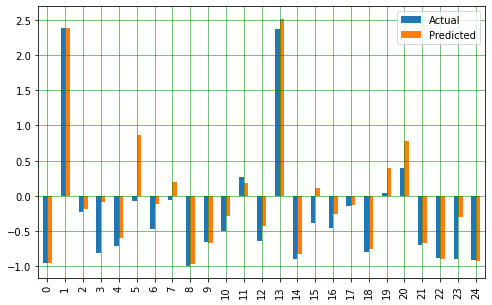

In [510]:
dff = pd.DataFrame({'Actual': Ytest_scale.flatten(), 'Predicted': Ypred_scale.flatten()})
df1 = dff.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [511]:
print('R2_Error:',r2_score(Ytest_scale, Ypred_scale))

R2_Error: 0.8765156449659064


In [512]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest_scale, Ypred_scale))  

Mean Absolute Error: 0.21911955081328188


# **Predict with scale&OHE**

In [0]:
trn_OHE_scale = df_OHE[:,:11]
trg_OHE_scale = df_OHE[:, 11]

trg_OHE_scale = preprocessing.scale(trg_OHE_scale)

Xtrn_OHE_scale, Xtest_OHE_scale, Ytrn_OHE_scale, Ytest_OHE_scale = train_test_split(trn_OHE_scale, trg_OHE_scale, test_size=0.4)
Ytrn_OHE_scale = Ytrn_OHE_scale.astype('float')

In [0]:
# trn_OHE_scale

In [0]:
# trg_OHE_scale

In [0]:
# Ytrn_OHE_scale

In [517]:
model_OHE_scale = RandomForestRegressor()
model_OHE_scale.fit(Xtrn_OHE_scale, Ytrn_OHE_scale)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [518]:
model_OHE_scale.feature_importances_

array([0.00341058, 0.00348219, 0.30256016, 0.30054736, 0.00527674,
       0.00565959, 0.00376155, 0.00398191, 0.13953891, 0.21437409,
       0.01740693])

In [0]:
Ypred_OHE_scale = model_OHE_scale.predict(Xtest_OHE_scale)
Ytest_OHE_scale = Ytest_OHE_scale.astype('float')
# plt.plot(Ytest_OHE_scale)
# plt.plot(Ypred_OHE_scale)
# plt.show()

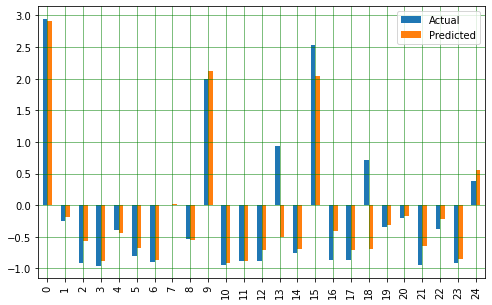

In [520]:
dff = pd.DataFrame({'Actual': Ytest_OHE_scale.flatten(), 'Predicted': Ypred_OHE_scale.flatten()})
df1 = dff.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [521]:
print('R2_Error:',r2_score(Ytest_OHE_scale, Ypred_OHE_scale))

R2_Error: 0.8472899820430457


In [522]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest_OHE_scale, Ypred_OHE_scale))  

Mean Absolute Error: 0.20881294068517403
